In [3]:
import pandas as pd

# Load the uploaded CSV files
random_search_df = pd.read_csv('dataset/0908_0_2_00_xgboost_evaluation_CV_RandomSearch_IDO.csv')
grid_search_df = pd.read_csv('dataset/0908_0_1_00_xgboost_evaluation_CV_GridSearch_IDO.csv')

# Display the first few rows of each dataframe to understand their structure
random_search_df.head(), grid_search_df.head()

(   Test Size                                   Method  \
 0       0.20      No Cross Validation (Random Search)   
 1       0.20  Sklearn cross_val_score (Random Search)   
 2       0.20                   xgb.cv (Random Search)   
 3       0.25      No Cross Validation (Random Search)   
 4       0.25  Sklearn cross_val_score (Random Search)   
 
                                          Best Params           Start Time  \
 0  {'subsample': 0.8, 'min_child_weight': 4, 'max...  2024-06-02 22:10:53   
 1  {'subsample': 0.8, 'min_child_weight': 4, 'max...  2024-06-02 22:10:53   
 2  {'subsample': 0.8, 'min_child_weight': 4, 'max...  2024-06-02 22:10:53   
 3  {'subsample': 0.6, 'min_child_weight': 2, 'max...  2024-06-02 22:13:29   
 4  {'subsample': 0.6, 'min_child_weight': 2, 'max...  2024-06-02 22:13:29   
 
               End Time  Duration (s)       MAE        MSE      RMSE        R2  
 0  2024-06-02 22:12:47    114.730431  1.650670   6.091417  2.468080  0.663238  
 1  2024-06-02 22:

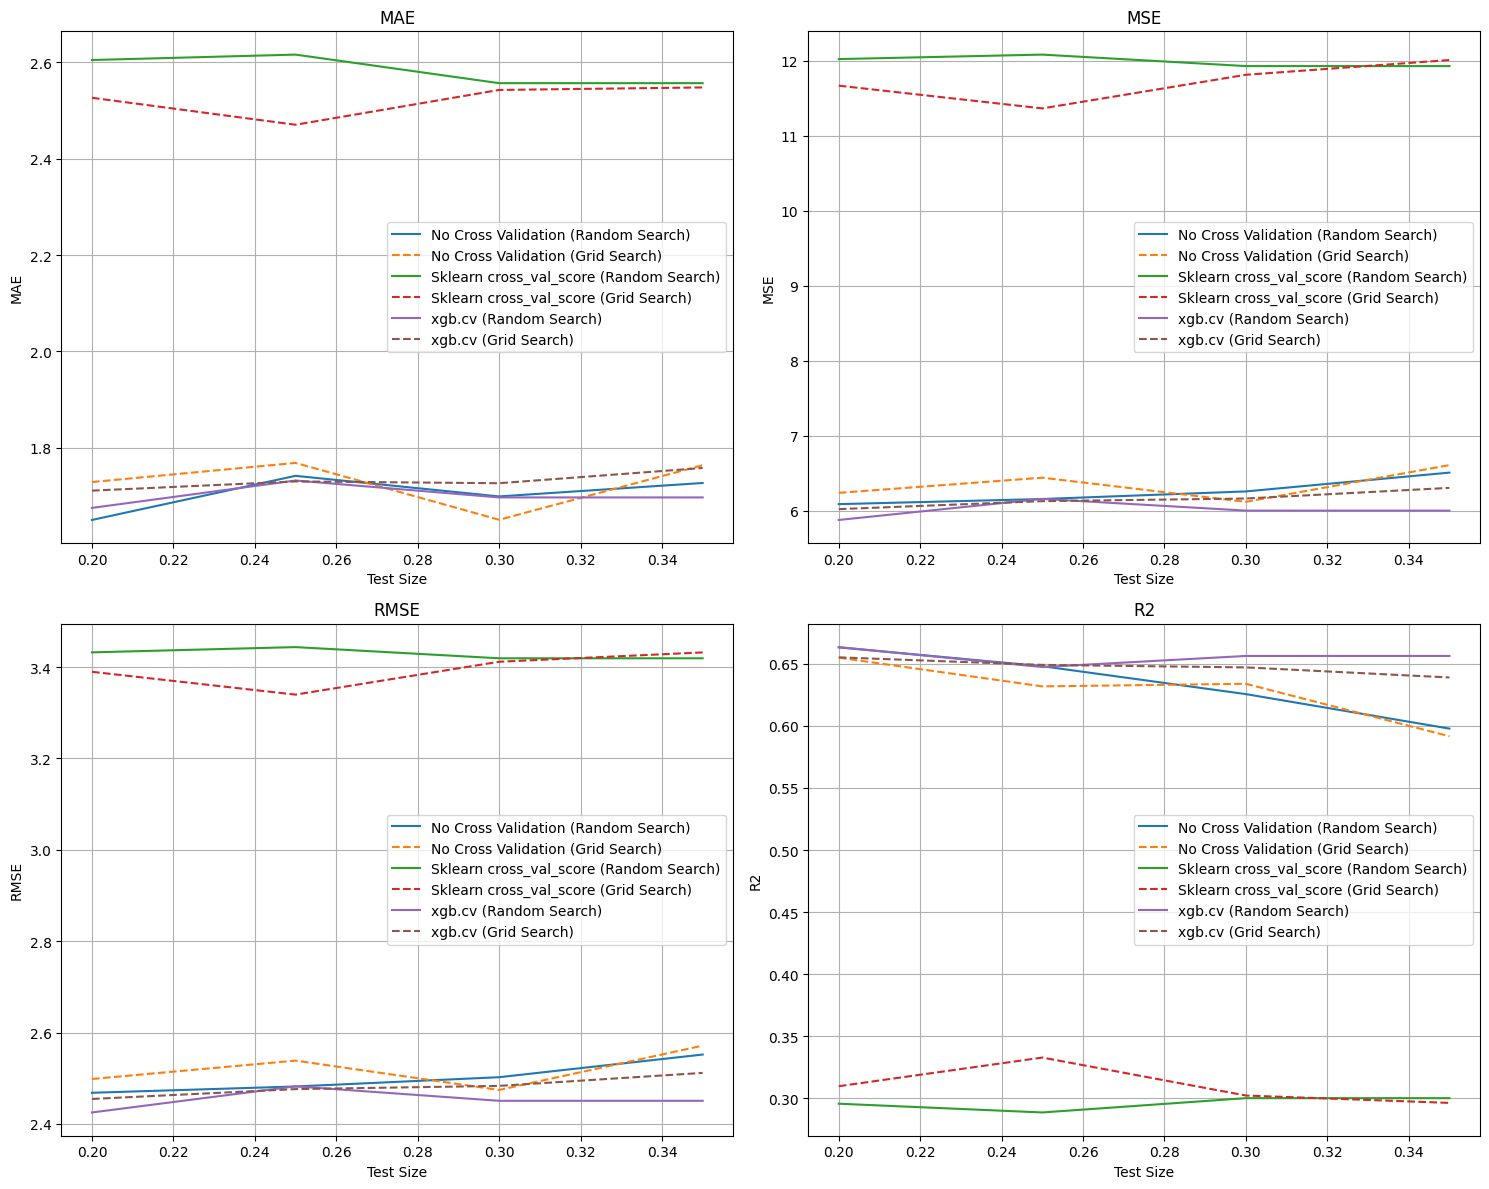

In [7]:
import matplotlib.pyplot as plt

# Extract relevant data for visualization
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
methods = ['No Cross Validation', 'Sklearn cross_val_score', 'xgb.cv']
search_methods = ['Random Search', 'Grid Search']

# Initialize figure and axes
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axs[i//2, i%2]
    
    # Plot data for Random Search
    random_data = random_search_df[random_search_df['Method'].str.contains('Random Search')]
    grid_data = grid_search_df[grid_search_df['Method'].str.contains('Grid Search')]
    
    for method in methods:
        random_metric_values = random_data[random_data['Method'].str.contains(method)][metric]
        grid_metric_values = grid_data[grid_data['Method'].str.contains(method)][metric]
        ax.plot(random_data['Test Size'].unique(), random_metric_values, label=f'{method} (Random Search)')
        ax.plot(grid_data['Test Size'].unique(), grid_metric_values, label=f'{method} (Grid Search)', linestyle='--')
    
    ax.set_title(metric)
    ax.set_xlabel('Test Size')
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True)

# Adjust layout and display plot
plt.tight_layout()
plt.show()


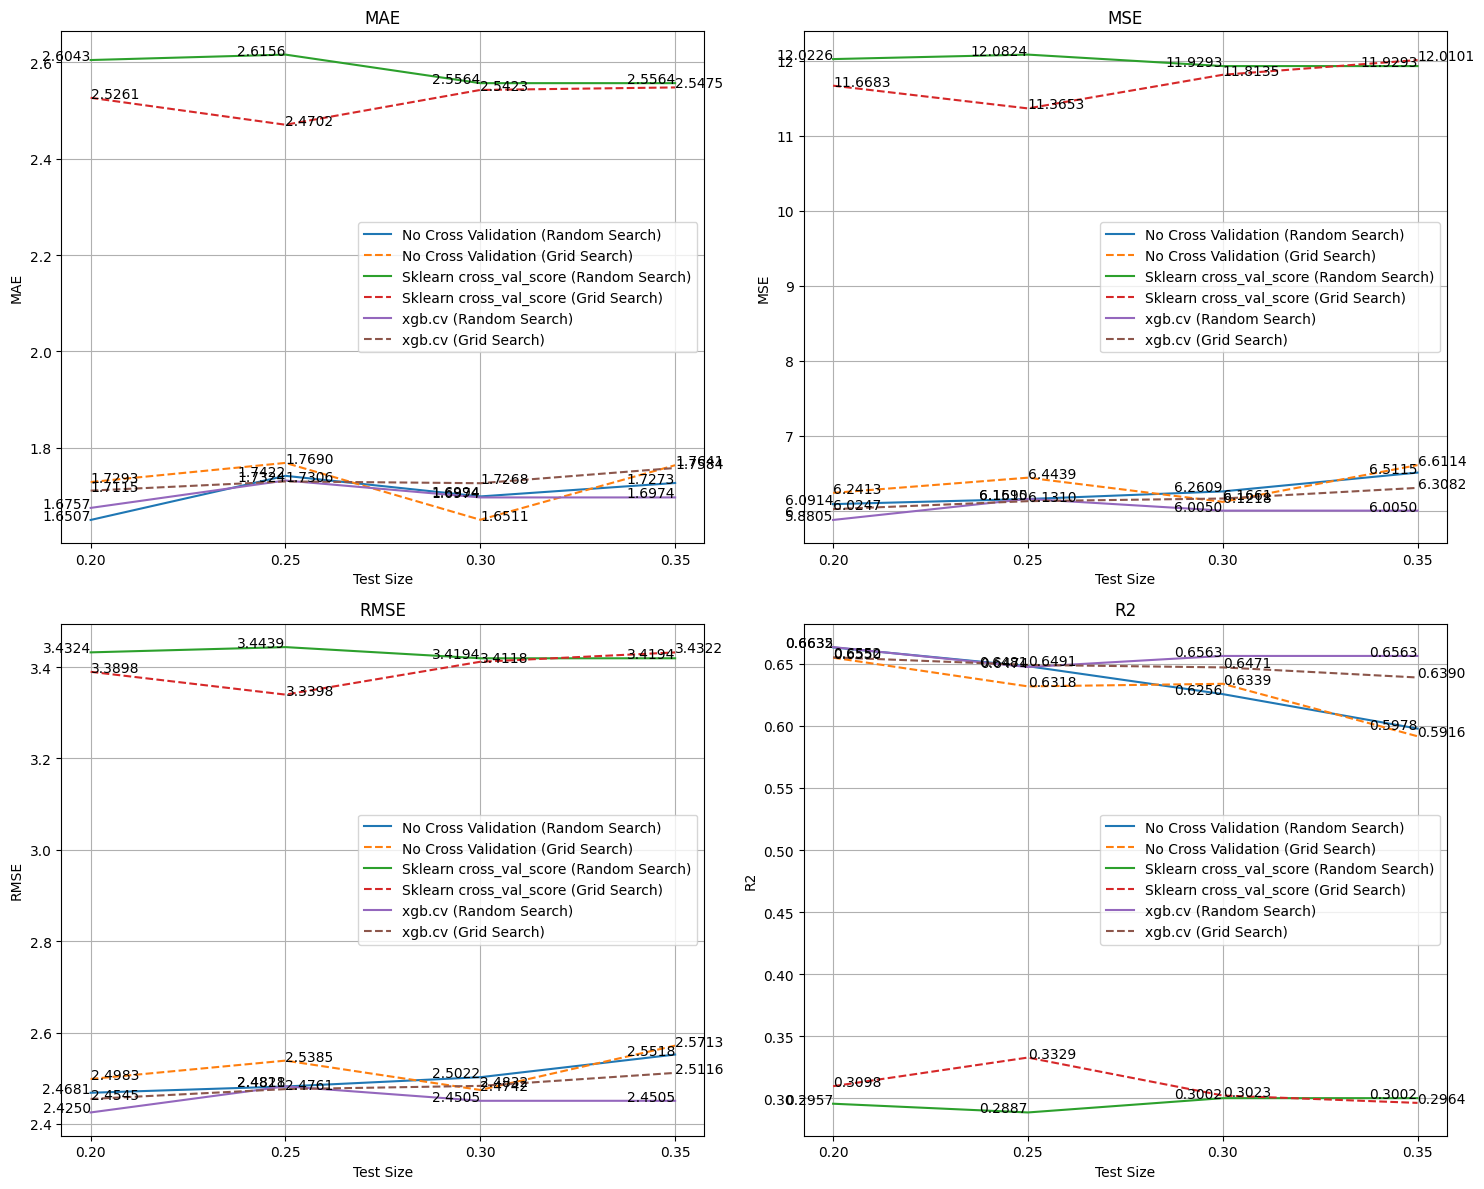

In [8]:
# Filter data for the specified test sizes
test_sizes = [0.2, 0.25, 0.3, 0.35]
filtered_random_search_df = random_search_df[random_search_df['Test Size'].isin(test_sizes)]
filtered_grid_search_df = grid_search_df[grid_search_df['Test Size'].isin(test_sizes)]

# Initialize figure and axes
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axs[i//2, i%2]
    
    # Plot data for Random Search
    random_data = filtered_random_search_df[filtered_random_search_df['Method'].str.contains('Random Search')]
    grid_data = filtered_grid_search_df[filtered_grid_search_df['Method'].str.contains('Grid Search')]
    
    for method in methods:
        random_metric_values = random_data[random_data['Method'].str.contains(method)][metric]
        grid_metric_values = grid_data[grid_data['Method'].str.contains(method)][metric]
        ax.plot(random_data['Test Size'].unique(), random_metric_values, label=f'{method} (Random Search)')
        ax.plot(grid_data['Test Size'].unique(), grid_metric_values, label=f'{method} (Grid Search)', linestyle='--')
        
        # Add data labels
        for x, y in zip(random_data['Test Size'].unique(), random_metric_values):
            ax.text(x, y, f'{y:.4f}', ha='right')
        for x, y in zip(grid_data['Test Size'].unique(), grid_metric_values):
            ax.text(x, y, f'{y:.4f}', ha='left')
    
    ax.set_title(metric)
    ax.set_xlabel('Test Size')
    ax.set_xticks(test_sizes)
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

## Agreggate 

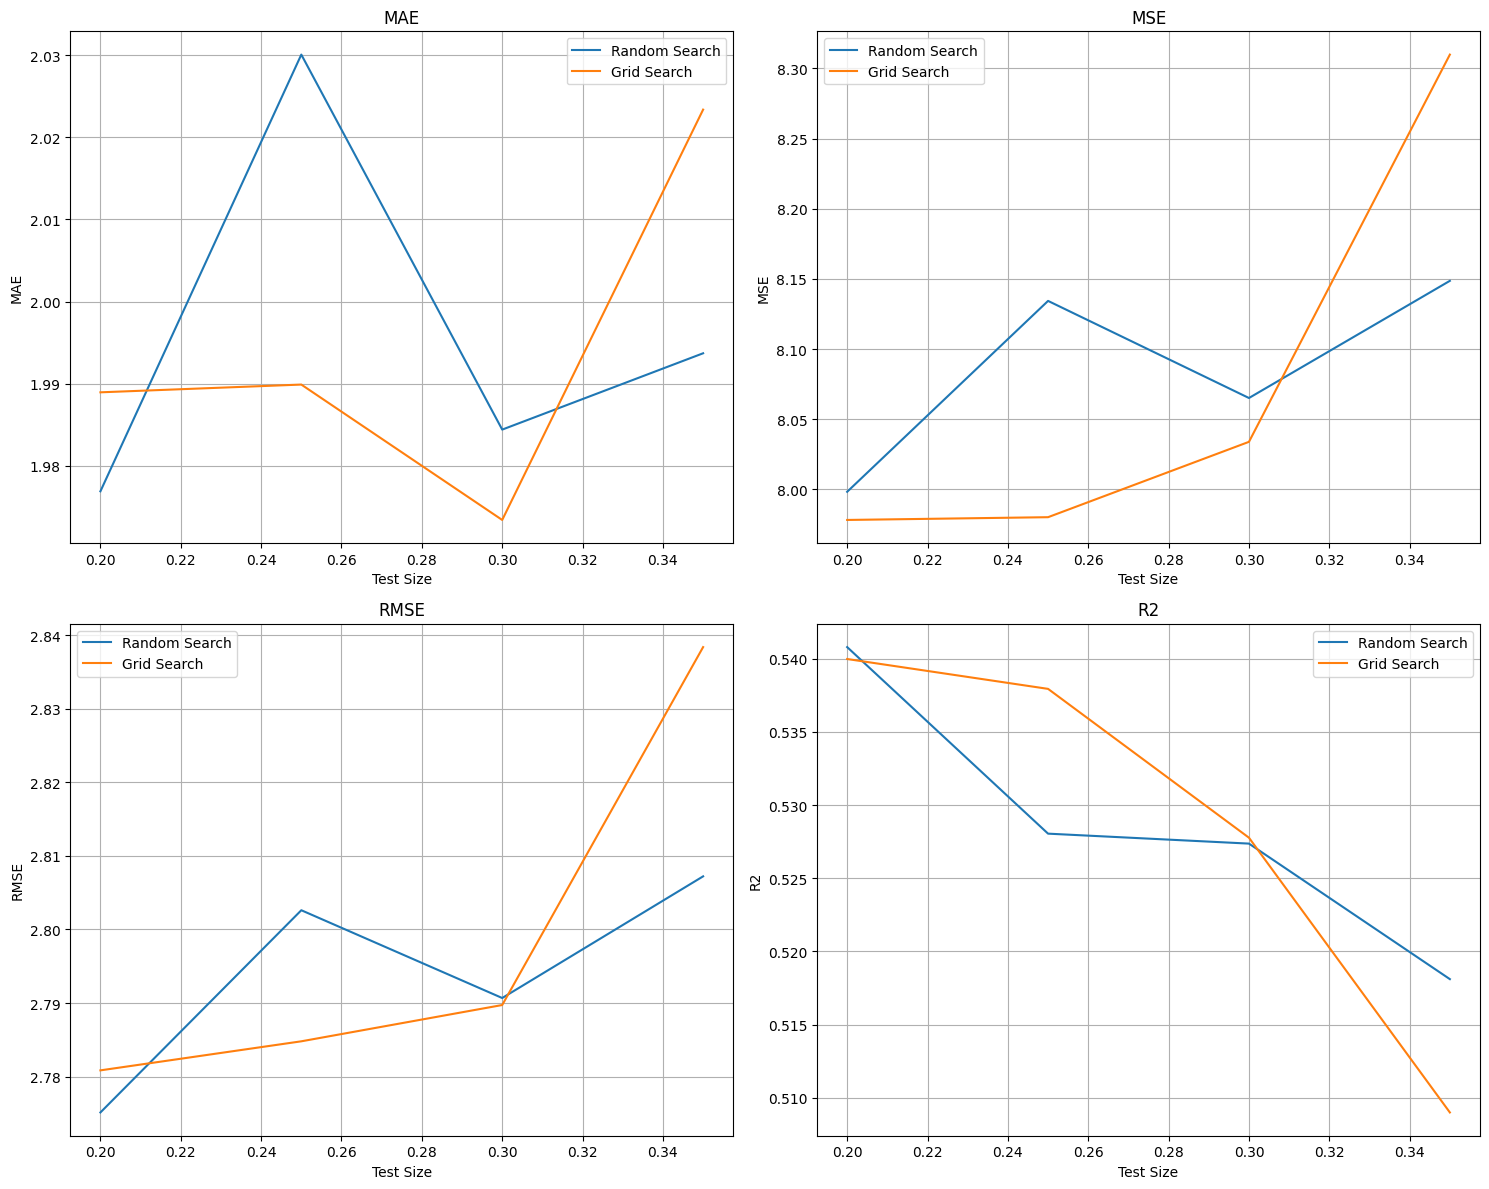

In [5]:
# Aggregate data for easier visualization
aggregate_data = pd.concat([
    random_search_df.assign(SearchMethod='Random Search'),
    grid_search_df.assign(SearchMethod='Grid Search')
])

# Aggregate by Test Size and Search Method for averaging
agg_metrics = aggregate_data.groupby(['Test Size', 'SearchMethod'])[metrics].mean().reset_index()

# Initialize figure and axes for aggregated visualization
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot each aggregated metric
for i, metric in enumerate(metrics):
    ax = axs[i//2, i%2]
    
    for search_method in search_methods:
        metric_values = agg_metrics[agg_metrics['SearchMethod'] == search_method][metric]
        test_sizes = agg_metrics[agg_metrics['SearchMethod'] == search_method]['Test Size']
        ax.plot(test_sizes, metric_values, label=search_method)
    
    ax.set_title(metric)
    ax.set_xlabel('Test Size')
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True)

# Adjust layout and display plot
plt.tight_layout()
plt.show()
